In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Dataset

df=pd.read_excel(r'D:\Project 2\Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [7]:
columns=df.columns
columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

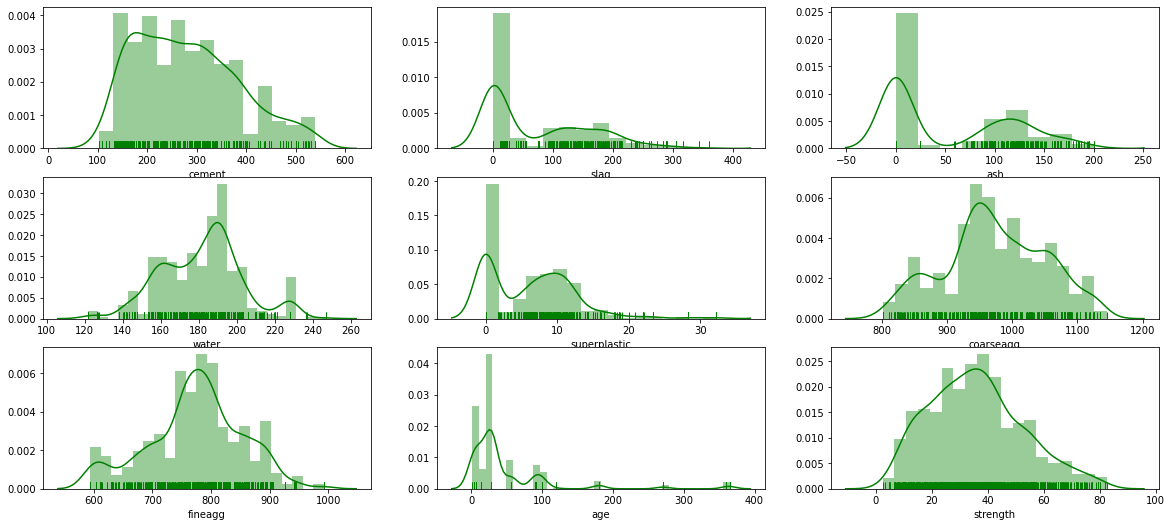

In [8]:
plt.figure(figsize=(20,12))
for i in range(0, 9):    
    plt.subplot(4, 3, i+1)
    sns.distplot(df[columns[i]],color='green',rug=True)

Coarse aggregate ,Strength ,Cement follow a apporimate normal distribution.

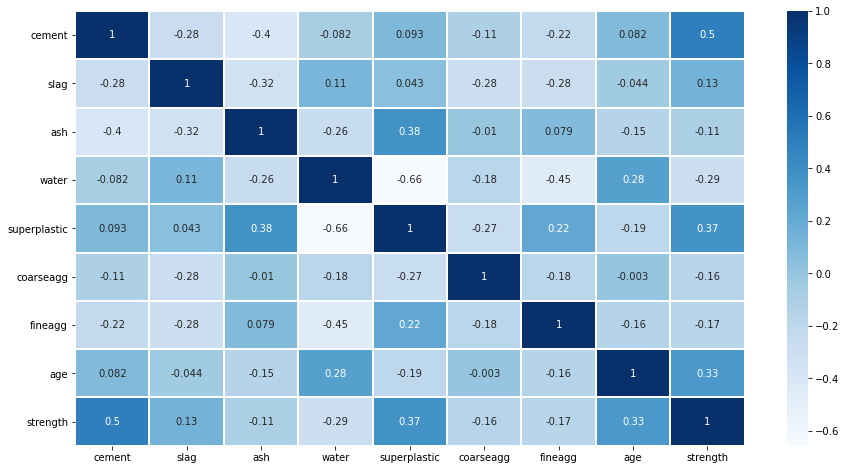

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()

In [10]:
corr=df.corr()
corr=corr['strength']
corr=corr.sort_values(ascending=False)
corr

strength        1.000000
cement          0.497833
superplastic    0.366102
age             0.328877
slag            0.134824
ash            -0.105753
coarseagg      -0.164928
fineagg        -0.167249
water          -0.289613
Name: strength, dtype: float64

Cement and SuperPlastic contribute more to strength of concrete

Text(0, 0.5, 'Cement')

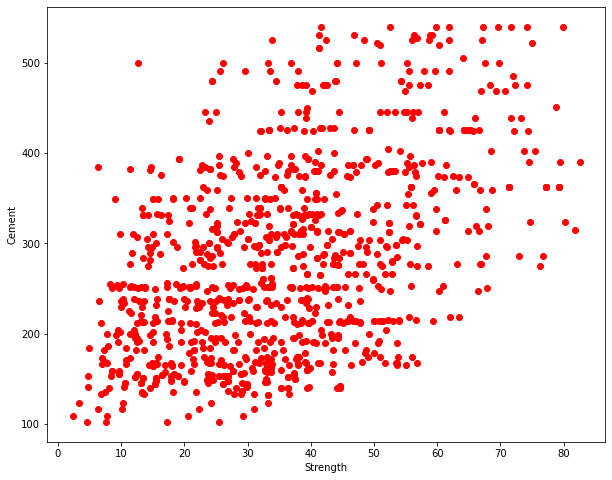

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(df['strength'],df['cement'],c='red',marker='o')
plt.xlabel('Strength')
plt.ylabel('Cement')

Text(0, 0.5, 'superplastic')

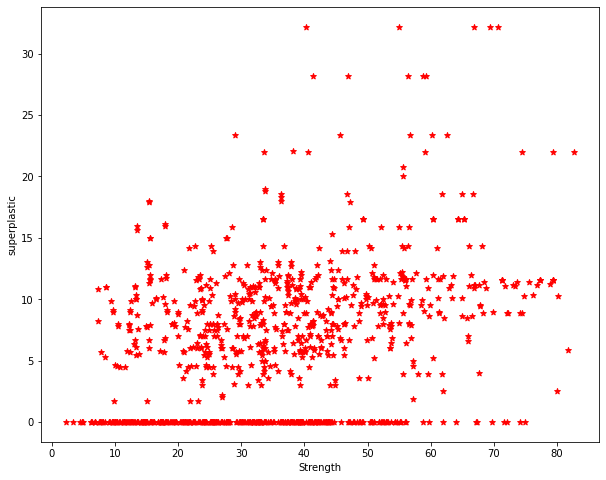

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(df['strength'],df['superplastic'],c='red',marker='*')
plt.xlabel('Strength')
plt.ylabel('superplastic')

Observations:
    
1) As the amount of cement increases Strength of concrete increases

2) No relation can be found between Strength and Superplastic

In [13]:
#Model Building

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor , AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [15]:
x=df.drop(['strength','ash','slag'],axis=1)
y=df.strength

In [16]:
x.head()

,cement,water,superplastic,coarseagg,fineagg,age
0,540.0,162.0,2.5,1040.0,676.0,28
1,540.0,162.0,2.5,1055.0,676.0,28
2,332.5,228.0,0.0,932.0,594.0,270
3,332.5,228.0,0.0,932.0,594.0,365
4,198.6,192.0,0.0,978.4,825.5,360


In [17]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

In [18]:
#Train Test Split of data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=47)

In [19]:
models=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),SVR()]

In [20]:
k=10

for i in models:
    print("{}".format(i))
    print("--------------------------------------------------------------------------")
    model=i.fit(X_train,y_train)
    predictions=model.predict(X_test)
    trainscore=model.score(X_train,y_train)
    testscore=model.score(X_test,y_test)
    cv = KFold(n_splits=k, random_state=42, shuffle=False)
    results=cross_val_score(i,x,y,cv=cv)
    accuracy=np.mean(abs(results))
    print('TrainScore : {}'.format(trainscore))
    print('TestScore : {}'.format(testscore))
    print('KFoldScore : {}'.format(accuracy))
    print("--------------------------------------------------------------------------")

LinearRegression()
--------------------------------------------------------------------------
TrainScore : 0.5756625140058842
TestScore : 0.5531331648075872
KFoldScore : 0.42252403766798324
--------------------------------------------------------------------------
DecisionTreeRegressor()
--------------------------------------------------------------------------
TrainScore : 0.9951414205486767
TestScore : 0.821376478565249
KFoldScore : 0.534387925856558
--------------------------------------------------------------------------
RandomForestRegressor()
--------------------------------------------------------------------------
TrainScore : 0.9796849374278173
TestScore : 0.9061962261203024
KFoldScore : 0.7184814227331741
--------------------------------------------------------------------------
GradientBoostingRegressor()
--------------------------------------------------------------------------
TrainScore : 0.9297759257407987
TestScore : 0.8869514686922461
KFoldScore : 0.698948122267916
--

RandomForestRegressor performs better when compared to other algorithms.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [22]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
rf = RandomForestRegressor()

In [24]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=0, random_state=49, n_jobs =-1)

In [25]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=49, scoring='neg_mean_squared_error')

In [26]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [32]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [290,300,310]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [18,20,22]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [33]:
# Create the random grid

grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(grid_search)

{'n_estimators': [290, 300, 310], 'max_features': ['sqrt'], 'max_depth': [18, 20, 22], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2]}


In [34]:
grid_random = GridSearchCV(estimator = rf, param_grid = grid_search,scoring='neg_mean_squared_error', cv = 5, verbose=0, n_jobs =-1)

In [35]:
grid_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [18, 20, 22], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [290, 300, 310]},
             scoring='neg_mean_squared_error')

In [36]:
grid_random.best_params_

{'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 310}

In [37]:
#Final model 

In [42]:
model=RandomForestRegressor(max_depth=18,
 max_features='sqrt',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=310)

In [43]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', n_estimators=310)

In [44]:
predictions=model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.9102878070543109

Since our r2_score is close 1, we can say that the model is good.

In [62]:
#Model Deployment

In [63]:
import pickle

pickle.dump(model,open('model.pkl','wb'))